## Forecast exploration

In this notebook, I will show:

- Linear Fit: x = model production per quality group (short tons) and y = heats forecasted
- Uncertainty: | grade production mean - grade production max deviation |

In [31]:
import utility.linear_fit
import utility.preprocess

class DummyUploadFile:
    def __init__(self, filepath):
        self.filename = filepath
        self.file = open(filepath, "rb")

    def close(self):
        self.file.close()

file_steel = DummyUploadFile("data/steel_grade_production.xlsx")
steel_grade_production = utility.preprocess.process_steel_grade(file_steel)

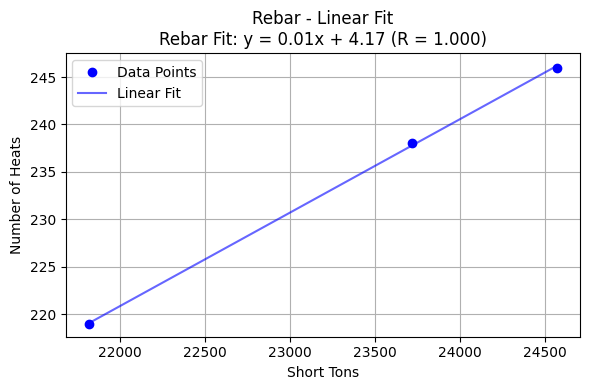

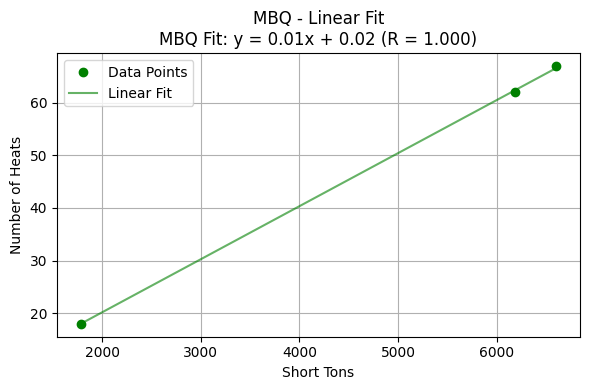

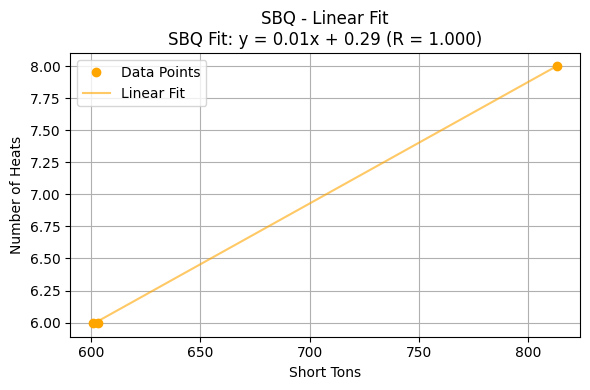

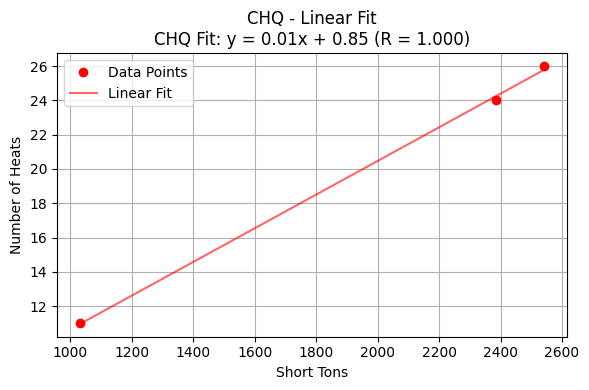

In [32]:
steel_prod = steel_grade_production.groupby("Quality group").sum(numeric_only=True)
file_forecast = DummyUploadFile("data/product_groups_monthly.xlsx")
forecast = utility.preprocess.sheet_to_pandas(file_forecast)


data = {
    "Rebar": (steel_prod.loc["Rebar"].tolist(), forecast[forecast["Quality:"] == "Rebar"].iloc[0, 1:-1].tolist(), "blue"),
    "MBQ": (steel_prod.loc["MBQ"].tolist(),forecast[forecast["Quality:"] == "MBQ"].iloc[0, 1:-1].tolist(), "green"),
    "SBQ": (steel_prod.loc["SBQ"].tolist(), forecast[forecast["Quality:"] == "SBQ"].iloc[0, 1:-1].tolist(), "orange"),
    "CHQ": (steel_prod.loc["CHQ"].tolist(), forecast[forecast["Quality:"] == "CHQ"].iloc[0, 1:-1].tolist(), "red")
}

utility.linear_fit.plot_linear_fit(data)

In [33]:
df = steel_grade_production.groupby("Grade").sum(numeric_only=True)

df["Total"] = df.sum(axis=1)
df["Mean"] = df.iloc[:, :-1].mean(axis=1) 
df["Uncertainty"] = df.iloc[:, :-2].apply(
    lambda row: max(abs(row.mean() - row.min()), abs(row.max() - row.mean())),
    axis=1
)

df

,2024-06-24 00:00:00,2024-07-24 00:00:00,2024-08-24 00:00:00,Total,Mean,Uncertainty
Grade,,,,,,
44W,0,3204,3112,6316,2105.333333,2105.333333
50W,0,3199,2879,6078,2026.000000,2026.000000
55W,333,0,0,333,111.000000,222.000000
60W,0,0,0,0,0.000000,0.000000
A36,0,202,199,401,133.666667,133.666667
A53/A543,2078,1032,0,3110,1036.666667,1041.333333
A53/C591,308,0,2541,2849,949.666667,1591.333333
A5888,512,0,0,512,170.666667,341.333333
B500A,8724,9230,8989,26943,8981.000000,257.000000
